In [22]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the data points and labels
X = np.array([
    [-2, 9], [3, 14], [4, 4], [8, -6], [12, -4], [13, 11],  # Positive class
    [-11, 8], [-8, -3], [-6, 4], [-2, -10], [2, -15], [6, -14]  # Negative class
])
y = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1])

# Number of variables (b, w1, w2)
d = 3

# Define the QP problem components
Q = np.zeros((d, d))
Q[1:, 1:] = np.eye(2)  # Quadratic term for w1^2 + w2^2
p = np.zeros(d)   # No linear term

# Inequality constraints A * u >= c
A = np.hstack((y[:, None], y[:, None] * X))  # [y, y*x1, y*x2]
c = np.ones(len(y))

# Print Q
print("Matrix Q:")
for row in Q:
    print(" ".join(f"{value:>6.2f}" for value in row))

# Print A
print("\nMatrix A:")
for row in A:
    print(" ".join(f"{value:>6}" for value in row))

# Print p
print("\nVector p:")
print(" ".join(f"{value:>6.2f}" for value in p))

# Print c
print("\nVector c:")
print(" ".join(f"{value:>6.2f}" for value in c))

Matrix Q:
  0.00   0.00   0.00
  0.00   1.00   0.00
  0.00   0.00   1.00

Matrix A:
     1     -2      9
     1      3     14
     1      4      4
     1      8     -6
     1     12     -4
     1     13     11
    -1     11     -8
    -1      8      3
    -1      6     -4
    -1      2     10
    -1     -2     15
    -1     -6     14

Vector p:
  0.00   0.00   0.00

Vector c:
  1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00   1.00


In [25]:
# Minimize function that is both quadratic and linear term 1/2 * u^T Q u + pT u
def minimizing_func(u):
    return 0.5 * u.T @ Q @ u + p.T @ u

# Constraints: A @ u - c >= 0
def constraint(u, i):
    return A[i] @ u - c[i]

# Create an empty list to store the constraints
constraints = []

# Iterate over each index in the range of the length of vector c
for i in range(len(c)):
    # Define a constraint dictionary for the current index
    constraint_dict = {
        'type': 'ineq',  # Specify that this is an inequality constraint
        'fun': constraint,  # The function defining the constraint
        'args': (i,)  # Additional arguments to pass to the constraint function
    }
    # Append the constraint dictionary to the list of constraints
    constraints.append(constraint_dict)

# Solve the QP problem
u0 = np.zeros(d)  # Initial guess
solution = minimize(minimizing_func, u0, constraints=constraints, method='SLSQP')

# Extract results
b, w1, w2 = solution.x

print("Optimal bias (b):", b)
print(f"Optimal weights [w1 w2]: [{w1} {w2}]")

Optimal bias (b): -0.09090909090909106
Optimal weights [w1 w2]: [0.27272727272727276 0.18181818181818168]


In [20]:
# Calculate the margin width
margin_width = 2 / np.sqrt(w1**2 + w2**2)

# Identify support vectors
distances = y * (np.dot(X, np.array([w1, w2])) + b)
support_vectors = X[np.isclose(distances, 1, atol=1e-4)]

print("Margin Width:", margin_width)
print("Support Vectors:")
for row in support_vectors:
    print("[{:>4}, {:>4}]".format(row[0], row[1]))

Margin Width: 6.101702158477521
Support Vectors:
[  -2,    9]
[   8,   -6]
[  -6,    4]
[   6,  -14]


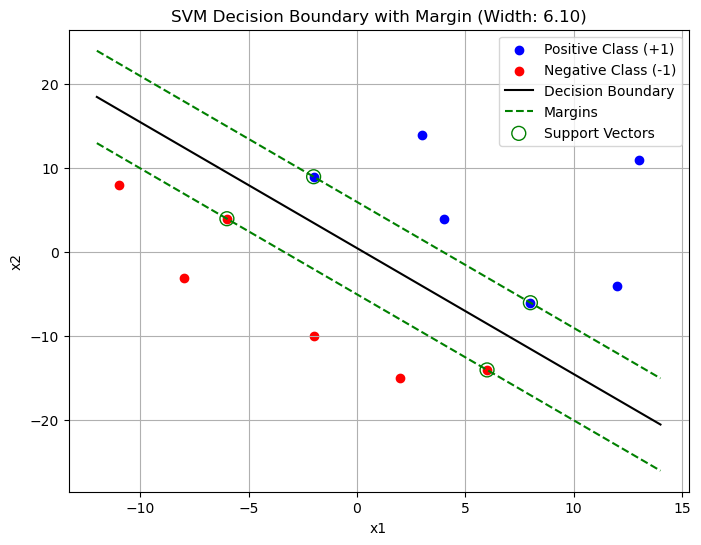

In [21]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:6, 0], X[:6, 1], color='blue', label='Positive Class (+1)')
plt.scatter(X[6:, 0], X[6:, 1], color='red', label='Negative Class (-1)')

# Plot the decision boundary and margins
x_vals = np.linspace(-12, 14, 100)
decision_boundary = -(w1 / w2) * x_vals - b / w2
margin_1 = decision_boundary + 1 / w2
margin_2 = decision_boundary - 1 / w2

plt.plot(x_vals, decision_boundary, 'k-', label='Decision Boundary')
plt.plot(x_vals, margin_1, 'g--', label='Margins')
plt.plot(x_vals, margin_2, 'g--')

# Highlight support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='green', label='Support Vectors')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'SVM Decision Boundary with Margin (Width: {margin_width:.2f})')
plt.legend()
plt.grid(True)
plt.show()
